In [1]:
import matplotlib.pyplot as plt
import rsatoolbox as rsa
import os
import globals as gl
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.core.pylabtools import figsize
from scipy.stats import pearsonr
import PcmPy as pcm

plt.style.use('default')

Base directory found: /cifs/diedrichsen/data/Chord_exp/EFC_learningfMRI
Atlas directory found: /cifs/diedrichsen/data/Atlas_templates/fs_LR_32


/home/UWO/memanue5/Documents/GitHub/PcmPy/PcmPy/util.py:139: RuntimeWarning: invalid value encountered in sqrt
  norms = np.sqrt(np.diag(G))


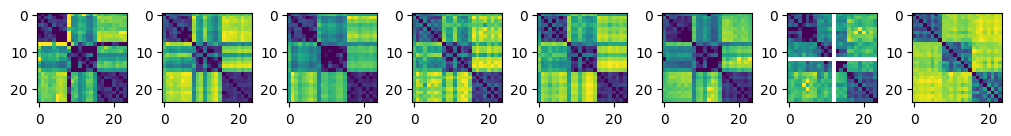

In [3]:
H = 'L'
rois = ['SMA', 'PMd', 'PMv', 'M1', 'S1', 'SPLa', 'SPLp', 'V1']
sn = 102
sn_idx = sn - 101

fig, axs = plt.subplots(1, len(rois), constrained_layout=True, figsize=(10, 5))

for r, roi in enumerate(rois):

    ax = axs[r]

    G_obs = np.load(os.path.join(gl.baseDir, gl.pcmDir, f'G_obs.{H}.{roi}.npy'))
    D = pcm.G_to_cosine_angle(G_obs[sn_idx])

    ax.imshow(D)

Text(0.5, 0.98, 'participant:102, force')

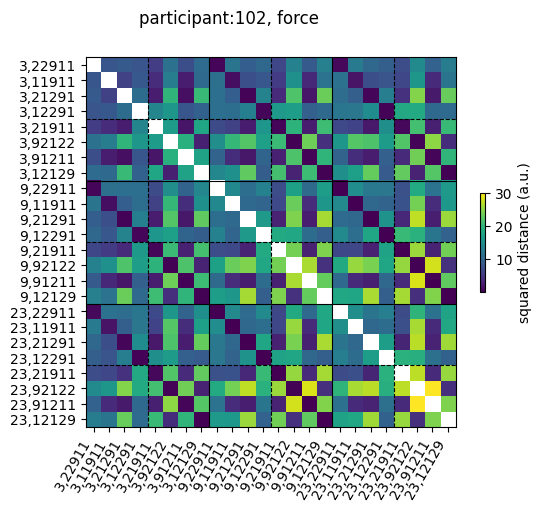

In [12]:
experiment = 'efc4'
vmin, vmax = -.1, .5
sn=103

pinfo = pd.read_csv(os.path.join(gl.baseDir,  'participants.tsv'), sep='\t')

fig, axs = plt.subplots()

rdms = rsa.rdm.load_rdm(os.path.join(gl.baseDir, gl.rdmDir, f'subj{sn}', f'force.hdf5'))
conds = rdms.pattern_descriptors['conds']

order = []
for day in [3, 9, 23]:
    for chord in ['trained', 'untrained']:
        for chordID in pinfo[pinfo.sn == sn].reset_index()[chord][0].split('.'):
            order.append(conds.index(f'{day},{chordID}'))
rdms.reorder(order)

cax = rsa.vis.show_rdm_panel(
        rdms, axs, cmap='viridis', #vmin=vmin, vmax=vmax
    )

axs.axhline(7.5, color='k', lw=.8, ls='-')
axs.axvline(7.5, color='k', lw=.8, ls='-')
axs.axhline(15.5, color='k', lw=.8, ls='-')
axs.axvline(15.5, color='k', lw=.8, ls='-')
axs.axhline(3.5, color='k', lw=.8, ls='--')
axs.axvline(3.5, color='k', lw=.8, ls='--')
axs.axhline(11.5, color='k', lw=.8, ls='--')
axs.axvline(11.5, color='k', lw=.8, ls='--')
axs.axhline(19.5, color='k', lw=.8, ls='--')
axs.axvline(19.5, color='k', lw=.8, ls='--')

axs.set_xticks(np.arange(len(rdms.pattern_descriptors['conds'])))
axs.set_xticklabels(rdms.pattern_descriptors['conds'], rotation=60, ha='right')
axs.set_yticks(axs.get_xticks())
axs.set_yticklabels(rdms.pattern_descriptors['conds'])

cbar = fig.colorbar(cax, ax=axs, orientation='vertical', fraction=.01)
cbar.set_label('squared distance (a.u.)')
fig.suptitle(f'participant:{sn}, force')

In [4]:
Hem = 'L'
rois = ['SMA', 'PMd', 'PMv', 'M1', 'S1', 'SPLa', 'SPLp', 'V1']
experiment = 'efc4'
vmin, vmax = -.1, .5
sn = 103
glm = 1

order = []
for day in [3, 9, 23]:
    for chord in ['trained', 'untrained']:
        for chordID in pinfo[pinfo.sn == sn].reset_index()[chord][0].split('.'):
            order.append(conds.index(f'{day},{chordID}'))
rdms.reorder(order)

roi = 'SMA'

fig, axs = plt.subplots()

rdms = rsa.rdm.load_rdm(os.path.join(gl.baseDir, gl.rdmDir, f'subj{sn}', f'glm{glm}.{Hem}.{roi}.hdf5'))
rdms.reorder(order)

cax = rsa.vis.show_rdm_panel(
        rdms, axs, rdm_descriptor='roi', cmap='viridis', #vmin=vmin, vmax=vmax
    )

axs.axhline(7.5, color='k', lw=.8, ls='-')
axs.axvline(7.5, color='k', lw=.8, ls='-')
axs.axhline(15.5, color='k', lw=.8, ls='-')
axs.axvline(15.5, color='k', lw=.8, ls='-')
axs.axhline(3.5, color='k', lw=.8, ls='--')
axs.axvline(3.5, color='k', lw=.8, ls='--')
axs.axhline(11.5, color='k', lw=.8, ls='--')
axs.axvline(11.5, color='k', lw=.8, ls='--')
axs.axhline(19.5, color='k', lw=.8, ls='--')
axs.axvline(19.5, color='k', lw=.8, ls='--')

axs.set_xticks(np.arange(len(rdms.pattern_descriptors['conds'])))
axs.set_xticklabels(rdms.pattern_descriptors['conds'], rotation=45, ha='right')
axs.set_yticks(axs.get_xticks())
axs.set_yticklabels(rdms.pattern_descriptors['conds'])
axs.set_title(roi)

cbar = fig.colorbar(cax, ax=axs, orientation='vertical', fraction=.01)
cbar.set_label('squared distance (a.u.)')
fig.suptitle(f'participant:{sn}, hemisphere:{Hem}')

NameError: name 'pinfo' is not defined

Text(0.5, 0.98, 'participant:102, hemisphere:L')

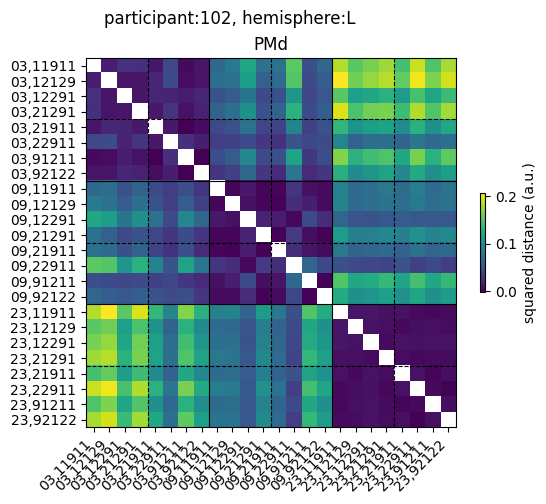

In [14]:
Hem = 'L'
rois = ['SMA', 'PMd', 'PMv', 'M1', 'S1', 'SPLa', 'SPLp', 'V1']
experiment = 'efc4'
vmin, vmax = -.1, .5
glm = 1

roi = 'PMd'

fig, axs = plt.subplots()

rdms = rsa.rdm.load_rdm(os.path.join(gl.baseDir,  gl.rdmDir, f'subj{sn}', f'glm{glm}.{Hem}.{roi}.hdf5'))
# rdms.reorder([0, 2, 6, 8, 4, 10, 12, 14, 1, 3, 7, 9, 5, 11, 13, 15])

cax = rsa.vis.show_rdm_panel(
        rdms, axs, rdm_descriptor='roi', cmap='viridis', #vmin=vmin, vmax=vmax
    )

axs.axhline(7.5, color='k', lw=.8, ls='-')
axs.axvline(7.5, color='k', lw=.8, ls='-')
axs.axhline(15.5, color='k', lw=.8, ls='-')
axs.axvline(15.5, color='k', lw=.8, ls='-')
axs.axhline(3.5, color='k', lw=.8, ls='--')
axs.axvline(3.5, color='k', lw=.8, ls='--')
axs.axhline(11.5, color='k', lw=.8, ls='--')
axs.axvline(11.5, color='k', lw=.8, ls='--')
axs.axhline(19.5, color='k', lw=.8, ls='--')
axs.axvline(19.5, color='k', lw=.8, ls='--')

axs.set_xticks(np.arange(len(rdms.pattern_descriptors['conds'])))
axs.set_xticklabels(rdms.pattern_descriptors['conds'], rotation=45, ha='right')
axs.set_yticks(axs.get_xticks())
axs.set_yticklabels(rdms.pattern_descriptors['conds'])
axs.set_title(roi)

cbar = fig.colorbar(cax, ax=axs, orientation='vertical', fraction=.01)
cbar.set_label('squared distance (a.u.)')
fig.suptitle(f'participant:{sn}, hemisphere:{Hem}')

Text(0.5, 0.98, 'participant:102, hemisphere:L')

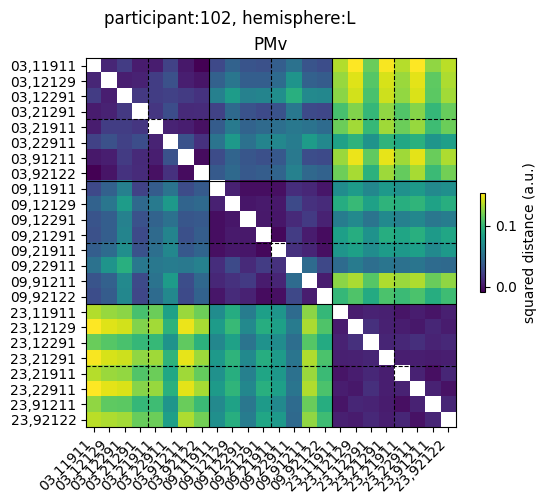

In [16]:
Hem = 'L'
rois = ['SMA', 'PMd', 'PMv', 'M1', 'S1', 'SPLa', 'SPLp', 'V1']
experiment = 'efc4'
vmin, vmax = -.1, .5
glm = 1

roi = 'PMv'

fig, axs = plt.subplots()

rdms = rsa.rdm.load_rdm(os.path.join(gl.baseDir,  gl.rdmDir, f'subj{sn}', f'glm{glm}.{Hem}.{roi}.hdf5'))
# rdms.reorder([0, 2, 6, 8, 4, 10, 12, 14, 1, 3, 7, 9, 5, 11, 13, 15])

cax = rsa.vis.show_rdm_panel(
        rdms, axs, rdm_descriptor='roi', cmap='viridis', #vmin=vmin, vmax=vmax
    )

axs.axhline(7.5, color='k', lw=.8, ls='-')
axs.axvline(7.5, color='k', lw=.8, ls='-')
axs.axhline(15.5, color='k', lw=.8, ls='-')
axs.axvline(15.5, color='k', lw=.8, ls='-')
axs.axhline(3.5, color='k', lw=.8, ls='--')
axs.axvline(3.5, color='k', lw=.8, ls='--')
axs.axhline(11.5, color='k', lw=.8, ls='--')
axs.axvline(11.5, color='k', lw=.8, ls='--')
axs.axhline(19.5, color='k', lw=.8, ls='--')
axs.axvline(19.5, color='k', lw=.8, ls='--')

axs.set_xticks(np.arange(len(rdms.pattern_descriptors['conds'])))
axs.set_xticklabels(rdms.pattern_descriptors['conds'], rotation=45, ha='right')
axs.set_yticks(axs.get_xticks())
axs.set_yticklabels(rdms.pattern_descriptors['conds'])
axs.set_title(roi)

cbar = fig.colorbar(cax, ax=axs, orientation='vertical', fraction=.01)
cbar.set_label('squared distance (a.u.)')
fig.suptitle(f'participant:{sn}, hemisphere:{Hem}')

Text(0.5, 0.98, 'participant:102, hemisphere:L')

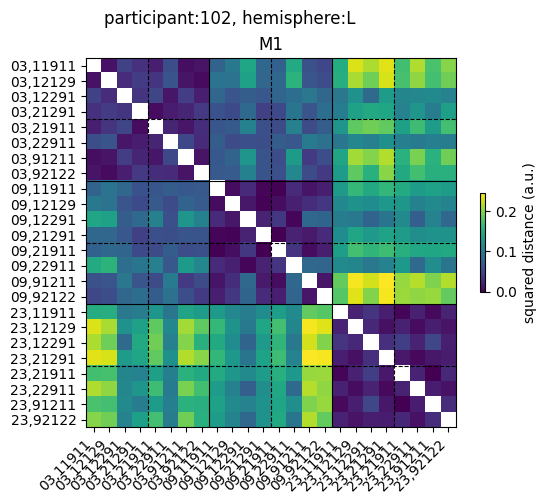

In [17]:
Hem = 'L'
rois = ['SMA', 'PMd', 'PMv', 'M1', 'S1', 'SPLa', 'SPLp', 'V1']
experiment = 'efc4'
vmin, vmax = -.1, .5
glm = 1

roi = 'M1'

fig, axs = plt.subplots()

rdms = rsa.rdm.load_rdm(os.path.join(gl.baseDir, gl.rdmDir, f'subj{sn}', f'glm{glm}.{Hem}.{roi}.hdf5'))

cax = rsa.vis.show_rdm_panel(
        rdms, axs, rdm_descriptor='roi', cmap='viridis', #vmin=vmin, vmax=vmax
    )

axs.axhline(7.5, color='k', lw=.8, ls='-')
axs.axvline(7.5, color='k', lw=.8, ls='-')
axs.axhline(15.5, color='k', lw=.8, ls='-')
axs.axvline(15.5, color='k', lw=.8, ls='-')
axs.axhline(3.5, color='k', lw=.8, ls='--')
axs.axvline(3.5, color='k', lw=.8, ls='--')
axs.axhline(11.5, color='k', lw=.8, ls='--')
axs.axvline(11.5, color='k', lw=.8, ls='--')
axs.axhline(19.5, color='k', lw=.8, ls='--')
axs.axvline(19.5, color='k', lw=.8, ls='--')

axs.set_xticks(np.arange(len(rdms.pattern_descriptors['conds'])))
axs.set_xticklabels(rdms.pattern_descriptors['conds'], rotation=45, ha='right')
axs.set_yticks(axs.get_xticks())
axs.set_yticklabels(rdms.pattern_descriptors['conds'])
axs.set_title(roi)

cbar = fig.colorbar(cax, ax=axs, orientation='vertical', fraction=.01)
cbar.set_label('squared distance (a.u.)')
fig.suptitle(f'participant:{sn}, hemisphere:{Hem}')

Text(0.5, 0.98, 'participant:102, hemisphere:L')

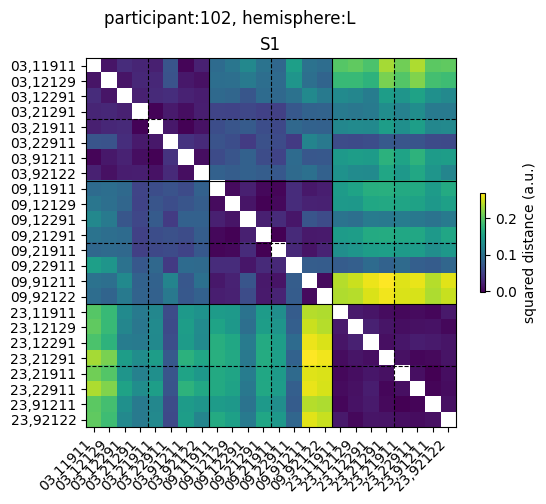

In [18]:
Hem = 'L'
rois = ['SMA', 'PMd', 'PMv', 'M1', 'S1', 'SPLa', 'SPLp', 'V1']
experiment = 'efc4'
vmin, vmax = -.1, .5
glm = 1

roi = 'S1'

fig, axs = plt.subplots()

rdms = rsa.rdm.load_rdm(os.path.join(gl.baseDir, gl.rdmDir, f'subj{sn}', f'glm{glm}.{Hem}.{roi}.hdf5'))

cax = rsa.vis.show_rdm_panel(
        rdms, axs, rdm_descriptor='roi', cmap='viridis', #vmin=vmin, vmax=vmax
    )

axs.axhline(7.5, color='k', lw=.8, ls='-')
axs.axvline(7.5, color='k', lw=.8, ls='-')
axs.axhline(15.5, color='k', lw=.8, ls='-')
axs.axvline(15.5, color='k', lw=.8, ls='-')
axs.axhline(3.5, color='k', lw=.8, ls='--')
axs.axvline(3.5, color='k', lw=.8, ls='--')
axs.axhline(11.5, color='k', lw=.8, ls='--')
axs.axvline(11.5, color='k', lw=.8, ls='--')
axs.axhline(19.5, color='k', lw=.8, ls='--')
axs.axvline(19.5, color='k', lw=.8, ls='--')

axs.set_xticks(np.arange(len(rdms.pattern_descriptors['conds'])))
axs.set_xticklabels(rdms.pattern_descriptors['conds'], rotation=45, ha='right')
axs.set_yticks(axs.get_xticks())
axs.set_yticklabels(rdms.pattern_descriptors['conds'])
axs.set_title(roi)

cbar = fig.colorbar(cax, ax=axs, orientation='vertical', fraction=.01)
cbar.set_label('squared distance (a.u.)')
fig.suptitle(f'participant:{sn}, hemisphere:{Hem}')

Text(0.5, 0.98, 'participant:102, hemisphere:L')

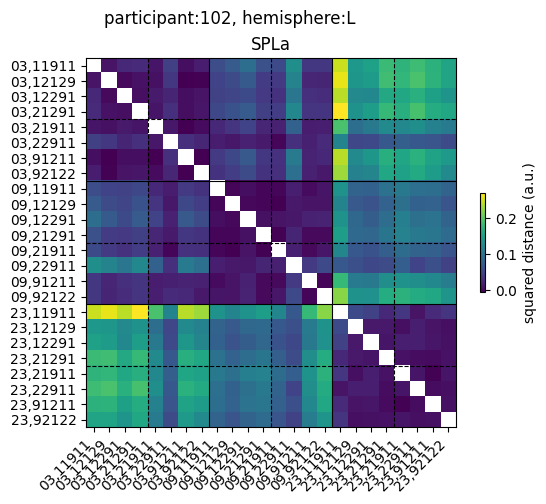

In [19]:
Hem = 'L'
rois = ['SMA', 'PMd', 'PMv', 'M1', 'S1', 'SPLa', 'SPLp', 'V1']
experiment = 'efc4'
vmin, vmax = -.1, .5
glm = 1

roi = 'SPLa'

fig, axs = plt.subplots()

rdms = rsa.rdm.load_rdm(os.path.join(gl.baseDir,  gl.rdmDir, f'subj{sn}', f'glm{glm}.{Hem}.{roi}.hdf5'))

cax = rsa.vis.show_rdm_panel(
        rdms, axs, rdm_descriptor='roi', cmap='viridis', #vmin=vmin, vmax=vmax
    )

axs.axhline(7.5, color='k', lw=.8, ls='-')
axs.axvline(7.5, color='k', lw=.8, ls='-')
axs.axhline(15.5, color='k', lw=.8, ls='-')
axs.axvline(15.5, color='k', lw=.8, ls='-')
axs.axhline(3.5, color='k', lw=.8, ls='--')
axs.axvline(3.5, color='k', lw=.8, ls='--')
axs.axhline(11.5, color='k', lw=.8, ls='--')
axs.axvline(11.5, color='k', lw=.8, ls='--')
axs.axhline(19.5, color='k', lw=.8, ls='--')
axs.axvline(19.5, color='k', lw=.8, ls='--')

axs.set_xticks(np.arange(len(rdms.pattern_descriptors['conds'])))
axs.set_xticklabels(rdms.pattern_descriptors['conds'], rotation=45, ha='right')
axs.set_yticks(axs.get_xticks())
axs.set_yticklabels(rdms.pattern_descriptors['conds'])
axs.set_title(roi)

cbar = fig.colorbar(cax, ax=axs, orientation='vertical', fraction=.01)
cbar.set_label('squared distance (a.u.)')
fig.suptitle(f'participant:{sn}, hemisphere:{Hem}')

Text(0.5, 0.98, 'participant:102, hemisphere:L')

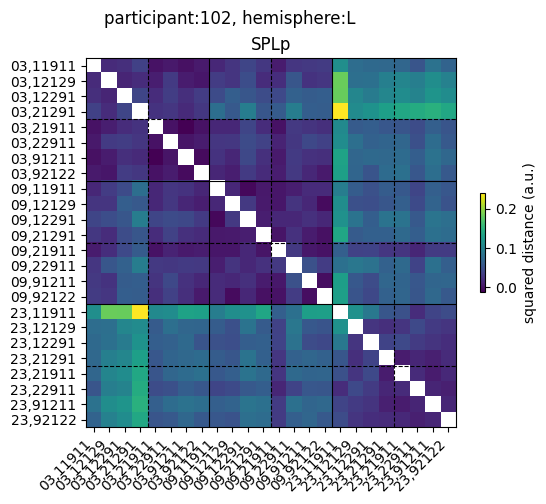

In [20]:
Hem = 'L'
rois = ['SMA', 'PMd', 'PMv', 'M1', 'S1', 'SPLa', 'SPLp', 'V1']
experiment = 'efc4'
vmin, vmax = -.1, .5
glm = 1

roi = 'SPLp'

fig, axs = plt.subplots()

rdms = rsa.rdm.load_rdm(os.path.join(gl.baseDir,  gl.rdmDir, f'subj{sn}', f'glm{glm}.{Hem}.{roi}.hdf5'))
cax = rsa.vis.show_rdm_panel(
        rdms, axs, rdm_descriptor='roi', cmap='viridis', #vmin=vmin, vmax=vmax
    )

axs.axhline(7.5, color='k', lw=.8, ls='-')
axs.axvline(7.5, color='k', lw=.8, ls='-')
axs.axhline(15.5, color='k', lw=.8, ls='-')
axs.axvline(15.5, color='k', lw=.8, ls='-')
axs.axhline(3.5, color='k', lw=.8, ls='--')
axs.axvline(3.5, color='k', lw=.8, ls='--')
axs.axhline(11.5, color='k', lw=.8, ls='--')
axs.axvline(11.5, color='k', lw=.8, ls='--')
axs.axhline(19.5, color='k', lw=.8, ls='--')
axs.axvline(19.5, color='k', lw=.8, ls='--')

axs.set_xticks(np.arange(len(rdms.pattern_descriptors['conds'])))
axs.set_xticklabels(rdms.pattern_descriptors['conds'], rotation=45, ha='right')
axs.set_yticks(axs.get_xticks())
axs.set_yticklabels(rdms.pattern_descriptors['conds'])
axs.set_title(roi)

cbar = fig.colorbar(cax, ax=axs, orientation='vertical', fraction=.01)
cbar.set_label('squared distance (a.u.)')
fig.suptitle(f'participant:{sn}, hemisphere:{Hem}')

Text(0.5, 0.98, 'participant:102, hemisphere:L')

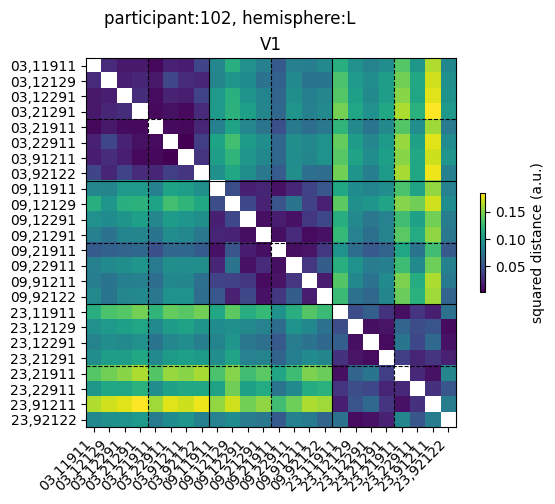

In [21]:
Hem = 'L'
rois = ['SMA', 'PMd', 'PMv', 'M1', 'S1', 'SPLa', 'SPLp', 'V1']
experiment = 'efc4'
vmin, vmax = -.1, .5
glm = 1

roi = 'V1'

fig, axs = plt.subplots()

rdms = rsa.rdm.load_rdm(os.path.join(gl.baseDir,  gl.rdmDir, f'subj{sn}', f'glm{glm}.{Hem}.{roi}.hdf5'))

cax = rsa.vis.show_rdm_panel(
        rdms, axs, rdm_descriptor='roi', cmap='viridis', #vmin=vmin, vmax=vmax
    )

axs.axhline(7.5, color='k', lw=.8, ls='-')
axs.axvline(7.5, color='k', lw=.8, ls='-')
axs.axhline(15.5, color='k', lw=.8, ls='-')
axs.axvline(15.5, color='k', lw=.8, ls='-')
axs.axhline(3.5, color='k', lw=.8, ls='--')
axs.axvline(3.5, color='k', lw=.8, ls='--')
axs.axhline(11.5, color='k', lw=.8, ls='--')
axs.axvline(11.5, color='k', lw=.8, ls='--')
axs.axhline(19.5, color='k', lw=.8, ls='--')
axs.axvline(19.5, color='k', lw=.8, ls='--')

axs.set_xticks(np.arange(len(rdms.pattern_descriptors['conds'])))
axs.set_xticklabels(rdms.pattern_descriptors['conds'], rotation=45, ha='right')
axs.set_yticks(axs.get_xticks())
axs.set_yticklabels(rdms.pattern_descriptors['conds'])
axs.set_title(roi)

cbar = fig.colorbar(cax, ax=axs, orientation='vertical', fraction=.01)
cbar.set_label('squared distance (a.u.)')
fig.suptitle(f'participant:{sn}, hemisphere:{Hem}')

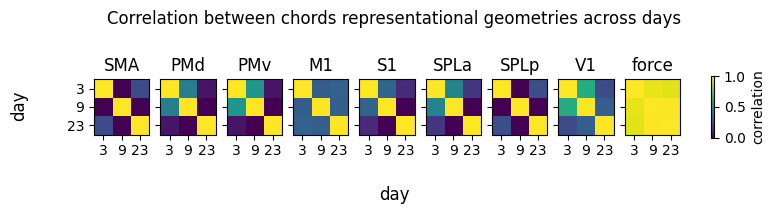

In [24]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

sn = 102

rois = ['SMA', 'PMd', 'PMv', 'M1', 'S1', 'SPLa', 'SPLp', 'V1']
days = [3, 9, 23]
pinfo = pd.read_csv(os.path.join(gl.baseDir,  'participants.tsv'), sep='\t')
chordID = pinfo[pinfo.sn == sn].reset_index()['trained'][0].split('.') + pinfo[pinfo.sn == sn].reset_index()['untrained'][0].split('.')

fig, axs = plt.subplots(1, len(rois) + 1,  figsize=(8, 2), sharex=True, sharey=True)

corr_rois = np.zeros((len(rois), 3, 3))
for r, roi in enumerate(rois):
    rdms = rsa.rdm.load_rdm(os.path.join(gl.baseDir, gl.rdmDir, f'subj{sn}', f'glm{glm}.{Hem}.{roi}.hdf5'))
    for I, i in enumerate(days):
        for J, j in enumerate(days):
            diss_i = rdms.subset_pattern('conds', [f'{i:02d},{tr}' for tr in chordID]).dissimilarities.squeeze()
            diss_j = rdms.subset_pattern('conds', [f'{j:02d},{tr}' for tr in chordID]).dissimilarities.squeeze()
            corr_rois[r, I, J] = pearsonr(diss_i, diss_j)[0]


for r, roi in enumerate(rois):
    axs[r].imshow(corr_rois[r], vmin=0, vmax=1)
    axs[r].set_title(roi)
    axs[r].set_xticks([0,1,2])
    axs[r].set_yticks([0,1,2])
    axs[r].set_xticklabels(days)
    axs[r].set_yticklabels(days)

rdms = rsa.rdm.load_rdm(os.path.join(gl.baseDir,gl.rdmDir, f'subj{sn}', f'force.hdf5'))
corr_force = np.zeros((3, 3,))
for I, i in enumerate(days):
        for J, j in enumerate(days):
            diss_i = rdms.subset_pattern('conds', [f'{i},{tr}' for tr in chordID]).dissimilarities.squeeze()
            diss_j = rdms.subset_pattern('conds', [f'{j},{tr}' for tr in chordID]).dissimilarities.squeeze()
            corr_force[I, J] = pearsonr(diss_i, diss_j)[0]

cax = axs[-1].imshow(corr_force, vmin=0, vmax=1)
axs[-1].set_title('force')
axs[-1].set_xticks([0,1,2])
axs[-1].set_yticks([0,1,2])
axs[-1].set_xticklabels(days)
axs[-1].set_yticklabels(days)

cbar = fig.colorbar(cax, ax=axs, orientation='vertical', fraction=.005)
cbar.set_label('correlation')

fig.supxlabel('day')
fig.supylabel('day')

fig.suptitle('Correlation between chords representational geometries across days')

plt.show()


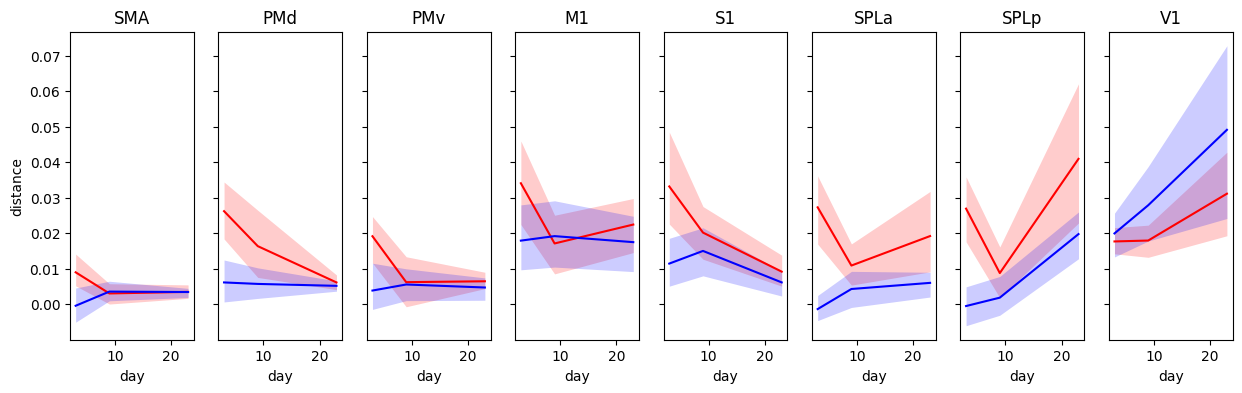

In [26]:
rois = ['SMA', 'PMd', 'PMv', 'M1', 'S1', 'SPLa', 'SPLp', 'V1']
days = [3, 9, 23]

pinfo = pd.read_csv(os.path.join(gl.baseDir,  'participants.tsv'), sep='\t')
chord = {
    'trained': pinfo[pinfo.sn == sn].reset_index()['trained'][0].split('.'),
    'untrained': pinfo[pinfo.sn == sn].reset_index()['untrained'][0].split('.')
}

distances = {
    'day': [],
    'chord': [],
    'roi': [],
    'distance': [],
}

fig, axs = plt.subplots(1, len(rois),  figsize=(15, 4), sharex=True, sharey=True)

for r, roi in enumerate(rois):
    rdms = rsa.rdm.load_rdm(os.path.join(gl.baseDir,gl.rdmDir, f'subj{sn}', f'glm{glm}.{Hem}.{roi}.hdf5'))
    for day in days:
        for ch in list(chord.keys()):
            diss = rdms.subset_pattern('conds', [f'{day:02d},{tr}' for tr in chord[ch]]).dissimilarities.squeeze()
            for d in diss:
                distances['distance'].append(d)
                distances['chord'].append(ch)
                distances['day'].append(day)
                distances['roi'].append(roi)

distances = pd.DataFrame(distances)

for r, roi in enumerate(rois):
    if r==len(rois):
        sns.lineplot(data=distances[distances.roi == roi], x='day', y='average distance (a.u.)', hue='chord', ax=axs[r], palette=['red', 'blue'], err_kws={'lw': 0})
    else:
        sns.lineplot(data=distances[distances.roi == roi], x='day', y='distance', hue='chord', ax=axs[r], palette=['red', 'blue'], err_kws={'lw': 0}, legend=False)
    axs[r].set_title(roi)
